In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('job.csv')

In [3]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [4]:
df.shape

(244828, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [6]:
df.isnull()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,False,False,False,False,True,True,False,True
1,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,True,True,True,False
4,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...
244823,False,False,False,False,False,False,True,False
244824,False,False,False,False,True,True,False,False
244825,False,False,False,False,False,False,True,False
244826,False,False,False,False,True,True,False,False


In [7]:
df.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [8]:
df.isnull().sum().sum()

434475

In [9]:
df.describe()

,hourly_low,hourly_high,budget
count,102422.000000,98775.000000,103891.000000
mean,17.339644,41.970610,911.473564
std,18.140065,47.850892,15729.738834
min,3.000000,3.000000,5.000000
25%,8.000000,20.000000,25.000000
50%,15.000000,30.000000,100.000000
75%,20.000000,50.000000,300.000000
max,998.000000,999.000000,1000000.000000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hourly_low,102422.0,17.339644,18.140065,3.0,8.0,15.0,20.0,998.0
hourly_high,98775.0,41.970610,47.850892,3.0,20.0,30.0,50.0,999.0
budget,103891.0,911.473564,15729.738834,5.0,25.0,100.0,300.0,1000000.0


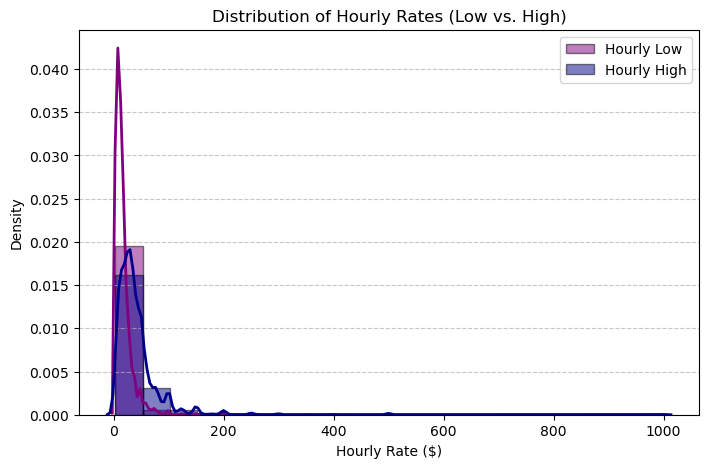

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns
# Plot histogram with KDE for hourly_low and hourly_high
plt.figure(figsize=(8, 5))
plt.hist(df["hourly_low"].dropna(), bins=20, alpha=0.5, color="purple", edgecolor="black", density=True, label="Hourly Low")
plt.hist(df["hourly_high"].dropna(), bins=20, alpha=0.5, color="darkblue", edgecolor="black", density=True, label="Hourly High")

# Add KDE plots
import seaborn as sns
sns.kdeplot(df["hourly_low"].dropna(), color="purple", linewidth=2)
sns.kdeplot(df["hourly_high"].dropna(), color="darkblue", linewidth=2)

# Labels and title
plt.xlabel("Hourly Rate ($)")
plt.ylabel("Density")
plt.title("Distribution of Hourly Rates (Low vs. High)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\324556317.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")


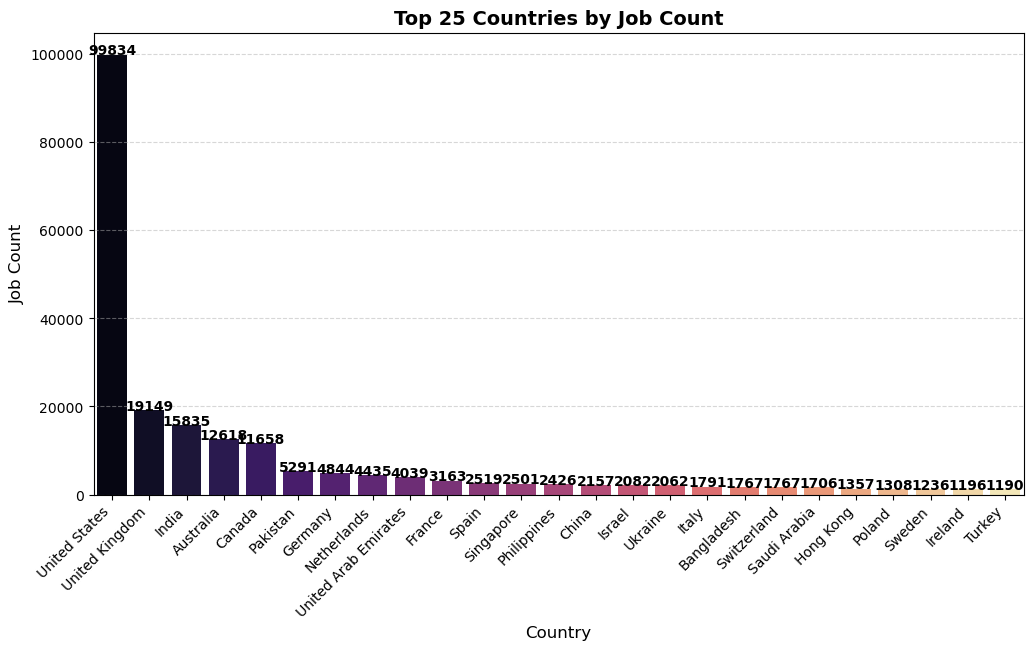

In [12]:
country_counts = df["country"].dropna().value_counts()

# Select top 25 countries by job count
top_countries = country_counts.head(25)

# Create a visually appealing bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")

# Customize appearance
plt.xlabel("Country", fontsize=12)
plt.ylabel("Job Count", fontsize=12)
plt.title("Top 25 Countries by Job Count", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels
for i, v in enumerate(top_countries.values):
    plt.text(i, v + 1, str(v), ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()



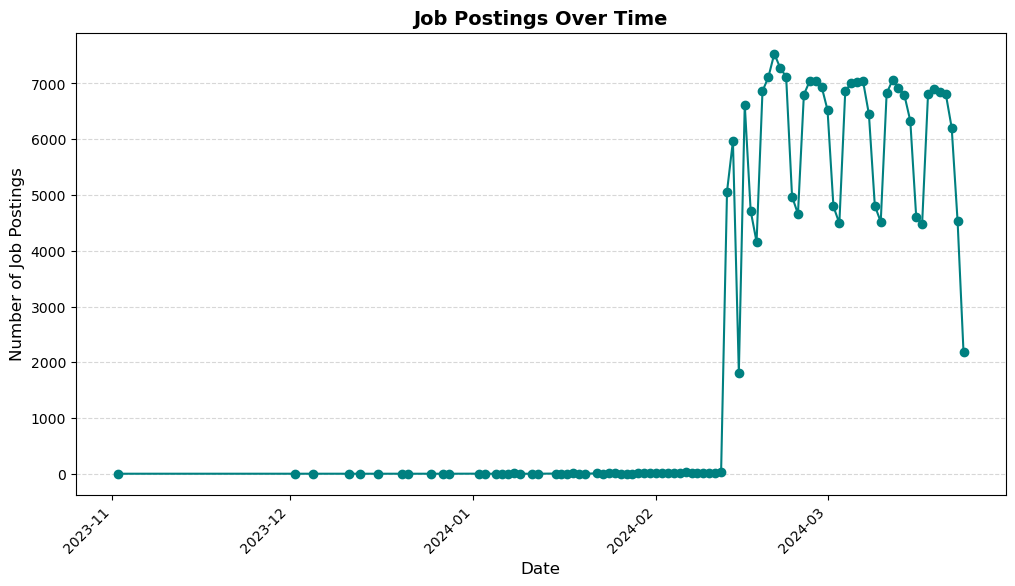

In [13]:
# Convert published_date to datetime format
df["published_date"] = pd.to_datetime(df["published_date"], errors="coerce")

# Group by date and count job postings
jobs_over_time = df.groupby(df["published_date"].dt.date).size()

# Plot job postings over time
plt.figure(figsize=(12, 6))
plt.plot(jobs_over_time.index, jobs_over_time.values, marker="o", linestyle="-", color="teal")

# Customize appearance
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.title("Job Postings Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\329810377.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=job_type_counts.values, palette=["red", "blue"])


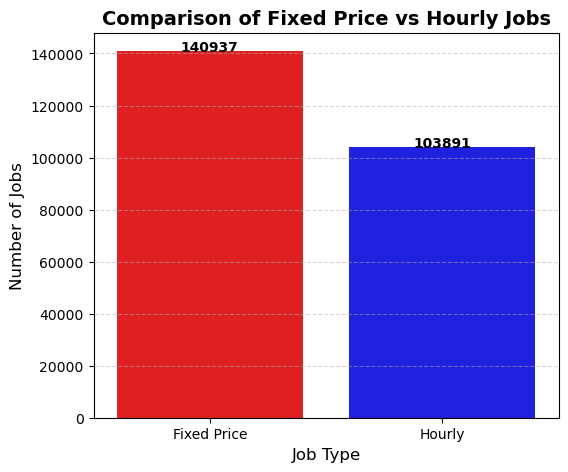

In [14]:
# Count fixed-price and hourly jobs
job_type_counts = df["is_hourly"].value_counts()

# Define labels
labels = ["Fixed Price", "Hourly"]


# Create a bar chart with red and blue colors
plt.figure(figsize=(6, 5))
sns.barplot(x=labels, y=job_type_counts.values, palette=["red", "blue"])

# Customize appearance
plt.xlabel("Job Type", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.title("Comparison of Fixed Price vs Hourly Jobs", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels
for i, v in enumerate(job_type_counts.values):
    plt.text(i, v + 5, str(v), ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()


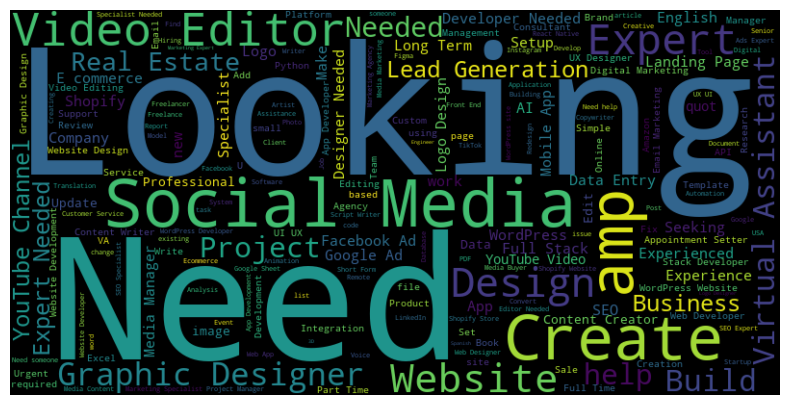

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job titles into a single string
text = " ".join(df["title"].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [16]:
# Fill missing values in 'title' and 'link' with their mode (most frequent value)
df["title"].fillna(df["title"].mode()[0], inplace=True)
df["link"].fillna(df["link"].mode()[0], inplace=True)

# Verify if missing values are fixed
df[["title", "link"]].isnull().sum()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\416142817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["title"].fillna(df["title"].mode()[0], inplace=True)
C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\416142817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

title    0
link     0
dtype: int64

In [17]:
# Check missing values in each column
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame for better readability
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_values_percentage})
missing_df = missing_df[missing_df["Missing Values"] > 0]  # Show only columns with missing values

missing_df


,Missing Values,Percentage
hourly_low,142406,58.165733
hourly_high,146053,59.655350
budget,140937,57.565720
country,5077,2.073701


In [18]:
# Calculate median values for hourly_low and hourly_high
median_hourly_low = df["hourly_low"].median()
median_hourly_high = df["hourly_high"].median()

# Fill missing values with the median
df["hourly_low"].fillna(median_hourly_low, inplace=True)
df["hourly_high"].fillna(median_hourly_high, inplace=True)

# Verify if missing values are fixed
df[["hourly_low", "hourly_high"]].isnull().sum()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\2494102757.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["hourly_low"].fillna(median_hourly_low, inplace=True)
C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\2494102757.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


hourly_low     0
hourly_high    0
dtype: int64

In [19]:
# Calculate budget for hourly jobs as the average of hourly_low and hourly_high
df.loc[df["is_hourly"] == True, "budget"] = (df["hourly_low"] + df["hourly_high"]) / 2

# Verify if budget for hourly jobs is updated
df["budget"].isnull().sum()


0

In [20]:
# Fill missing country values with "Unknown"
df["country"].fillna("Unknown", inplace=True)

# Verify if missing values are fixed
df["country"].isnull().sum()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\1369298560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["country"].fillna("Unknown", inplace=True)


0

In [21]:
df.isnull().sum().sum()

0

In [22]:
# look for duplicate values

df.duplicated().sum()

0

In [23]:
import re

# Function to clean the title
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply cleaning function to create 'cleaned_title' column
df["cleaned_title"] = df["title"].apply(clean_text)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already available
nltk.download("stopwords")
nltk.download("punkt")

# Get English stopwords
stop_words = set(stopwords.words("english"))

# Function to tokenize, remove stopwords, and clean text
def tokenize_and_clean(text):
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    cleaned_text = " ".join(words)  # Join words back into a sentence
    return clean_text(cleaned_text)  # Apply previous cleaning process

# Apply function to cleaned_title column
df["cleaned_title"] = df["cleaned_title"].apply(tokenize_and_clean)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ppppr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ppppr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
df[["title", "cleaned_title"]].head()

,title,cleaned_title
0,Experienced Media Buyer For Solar Pannel and R...,experienced media buyer solar pannel roofing i...
1,Full Stack Developer,full stack developer
2,SMMA Bubble App,smma bubble app
3,Talent Hunter Specialized in Marketing,talent hunter specialized marketing
4,Data Engineer,data engineer


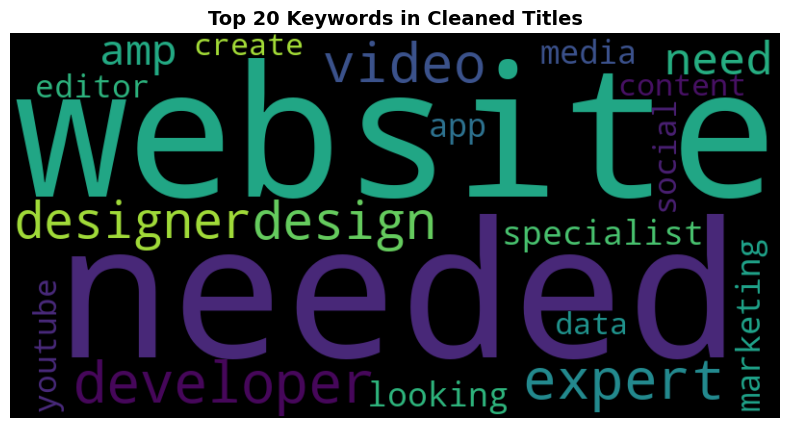

In [25]:
from collections import Counter

# Tokenize all words from cleaned_title column
all_words = " ".join(df["cleaned_title"]).split()

# Count word frequencies
word_freq = Counter(all_words)

# Get the top 20 most common words
top_20_words = dict(word_freq.most_common(20))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate_from_frequencies(top_20_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 20 Keywords in Cleaned Titles", fontsize=14, fontweight="bold")
plt.show()


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())



In [27]:
tfidf_scores = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("Top TF-IDF Keywords:\n", tfidf_scores.head(20))


Top TF-IDF Keywords:
 website       9772.815282
needed        9444.144526
developer     9281.078858
expert        8639.317196
design        8245.223935
video         7653.078071
designer      7598.460175
need          6453.572237
specialist    5483.601771
looking       5325.388663
amp           5070.280255
app           4962.724603
marketing     4697.190849
editor        4559.893358
data          4479.817450
create        4432.009381
youtube       4350.567937
wordpress     4248.651362
media         4217.733042
assistant     4151.447171
dtype: float64


In [28]:
# Create dictionaries for salary and example URLs for each keyword
keyword_salary = {}

for keyword in tfidf_scores.index:
    related_jobs = df[df['cleaned_title'].str.contains(keyword, na=False)]
    keyword_salary[keyword] = related_jobs['budget'].mean()

# Convert to a DataFrame for better reading
keyword_salary_df = pd.DataFrame({
    'Keyword': keyword_salary.keys(),
    'Average Salary': keyword_salary.values(),
}).sort_values(by='Average Salary', ascending=False)

# Preview the keyword-salary mapping
print(keyword_salary_df.head(10))


        Keyword  Average Salary
60      digital     1852.522328
29        sales     1832.128437
78         full     1197.821533
77          job     1146.074854
84      account      963.945363
99        stack      905.407966
27  development      869.190496
42        build      800.367362
65  application      764.515187
51      seeking      701.930362


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\4061830864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_keywords, x='Average Salary', y='Keyword', palette='viridis')


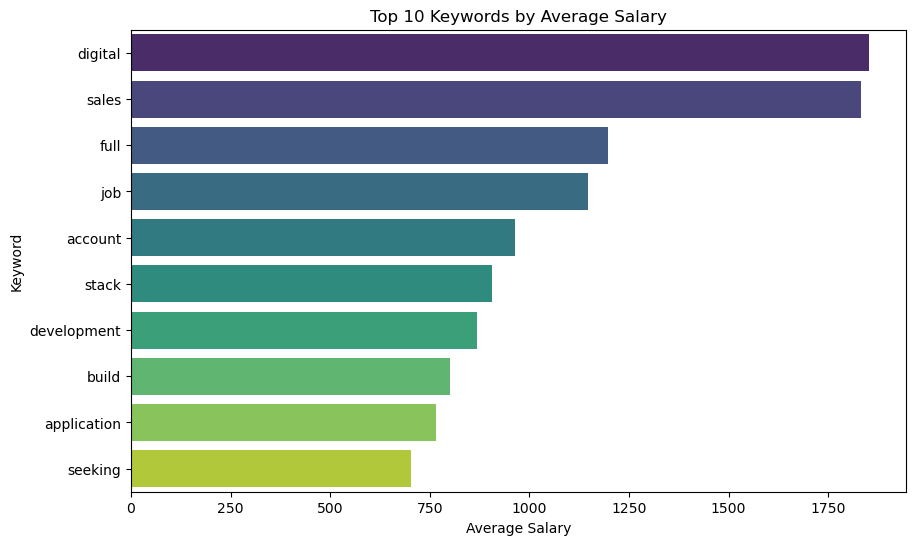

In [29]:
# Bar chart of top 10 high-paying keywords
top_10_keywords = keyword_salary_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_keywords, x='Average Salary', y='Keyword', palette='viridis')
plt.title('Top 10 Keywords by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Keyword')
plt.show()


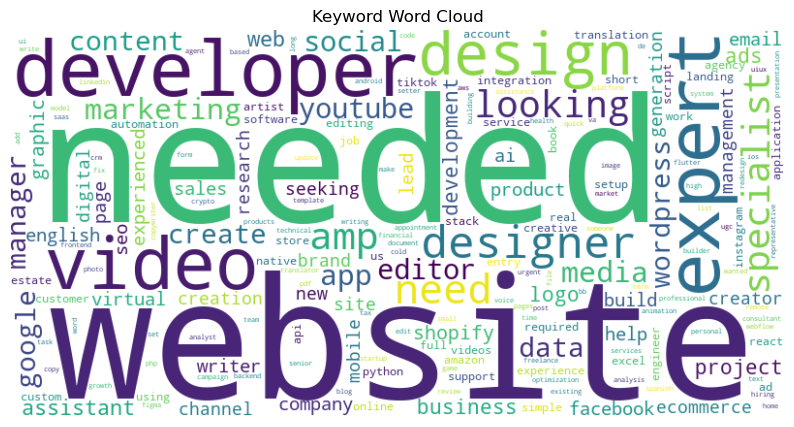

In [30]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_keywords = ' '.join(df['cleaned_title']).split()
keyword_counts = dict(Counter(all_keywords))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
plt.show()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\3606369445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_keywords, x='Average Salary', y='Keyword', palette='viridis')


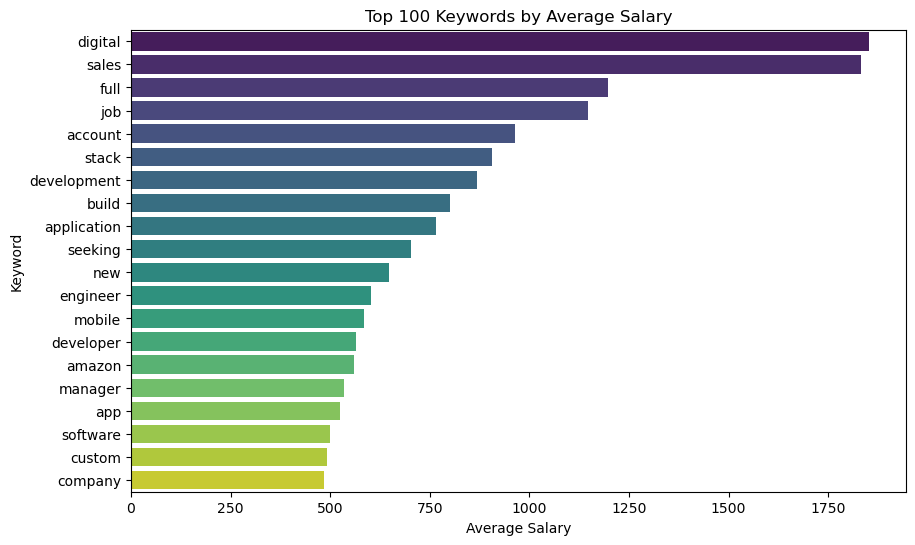

In [31]:
# Bar chart of top 20 high-paying keywords
top_20_keywords = keyword_salary_df.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_keywords, x='Average Salary', y='Keyword', palette='viridis')
plt.title('Top 100 Keywords by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Keyword')
plt.show()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\1737529157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_keyword_df['Average Salary'] = df['budget']


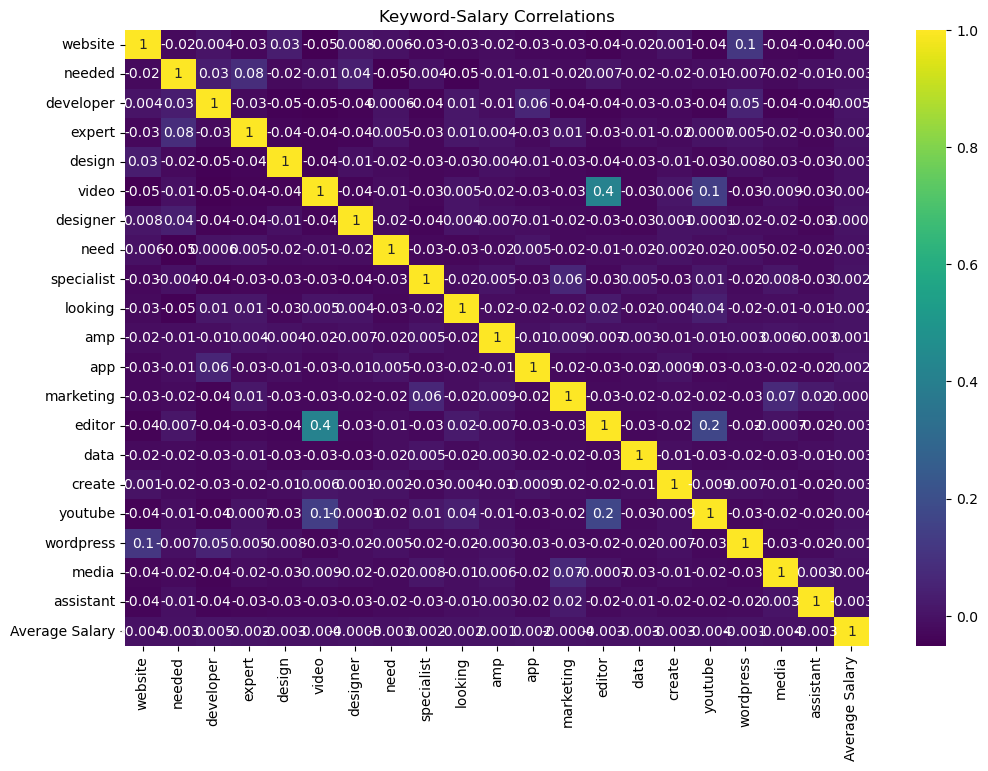

In [32]:
# Select top 20 keywords for correlation analysis
selected_keywords = tfidf_scores.index[:20]
selected_keyword_df = tfidf_df[selected_keywords]
selected_keyword_df['Average Salary'] = df['budget']

# Generate a heatmap showing the correlation between keywords and salaries
plt.figure(figsize=(12, 8))
sns.heatmap(selected_keyword_df.corr(), annot=True, cmap='viridis', fmt='0.1g')
plt.title('Keyword-Salary Correlations')
plt.show()


In [33]:
import re

# Map categories to corresponding regex patterns
category_patterns = {
    'software development': r'\b(developer|software|engineer|programmer|devops|backend|frontend|full stack)\b',
    'data science': r'\b(data|machine learning|ai|analytics|science|big data)\b',
    'design': r'\b(designer|ui|ux|graphic|visual|motion)\b',
    'manager': r'\b(manager|lead|head)\b',
    'marketing': r'\b(marketing|seo|advertising|campaign|social media)\b',
    'content writer': r'\b(writer|content|editor|author|translator|copywriter)\b',
    'education': r'\b(teacher|trainer|tutor|educator)\b',
    'assistant': r'\b(assistant|aide)\b',
    'legal': r'\b(legal|lawyer|attorney|paralegal)\b',
    'sales': r'\b(sales|business|growth)\b',
    'finance': r'\b(finance|accounting)\b',
    'customer support': r'\b(customer|support|service|client|helpdesk)\b'
}


In [34]:
# Function to match title to a category using regex
def categorize_with_regex(title):
    title = title.lower()
    for category, pattern in category_patterns.items():
        if re.search(pattern, title):  # Check if the pattern matches the title
            return category
    return 'other'

# Apply the regex-based categorization
df['job_category'] = df['cleaned_title'].apply(categorize_with_regex)

# Display the first few rows
print(df[['cleaned_title', 'job_category']].head())


                                       cleaned_title          job_category
0  experienced media buyer solar pannel roofing i...                 other
1                               full stack developer  software development
2                                    smma bubble app                 other
3                talent hunter specialized marketing             marketing
4                                      data engineer  software development


In [35]:
# checking the value counts of job category column
df['job_category'].value_counts()


job_category
other                   138819
software development     21208
marketing                15697
content writer           15437
design                   14676
data science             10061
manager                   9758
sales                     7943
assistant                 4974
customer support          3414
legal                     1470
education                  787
finance                    584
Name: count, dtype: int64

In [36]:
# Preview the categorized dataset
print(df[['cleaned_title', 'job_category']].head())


                                       cleaned_title          job_category
0  experienced media buyer solar pannel roofing i...                 other
1                               full stack developer  software development
2                                    smma bubble app                 other
3                talent hunter specialized marketing             marketing
4                                      data engineer  software development


In [37]:
# Convert 'published_date' to datetime format
df['published_date'] = pd.to_datetime(df['published_date'])


In [38]:
# Extract the year and month for grouping
df['YearMonth'] = df['published_date'].dt.to_period('M')


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\1326161895.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['published_date'].dt.to_period('M')


In [39]:
# Count the number of job postings per category for each month
job_trends = df.groupby(['YearMonth', 'job_category']).size().reset_index(name='Job Count')



In [40]:
# Pivot the data for better visualization
job_trends_pivot = job_trends.pivot(index='YearMonth', columns='job_category', values='Job Count').fillna(0)


In [41]:

# Preview the trends data
print(job_trends_pivot.tail())


job_category  assistant  content writer  customer support  data science  \
YearMonth                                                                 
2023-11             0.0             0.0               0.0           0.0   
2023-12             0.0             3.0               0.0           1.0   
2024-01             4.0             1.0               6.0           4.0   
2024-02          2105.0          6711.0            1376.0        4429.0   
2024-03          2865.0          8722.0            2032.0        5627.0   

job_category  design  education  finance  legal  manager  marketing    other  \
YearMonth                                                                      
2023-11          0.0        0.0      0.0    0.0      1.0        0.0      0.0   
2023-12          0.0        0.0      0.0    0.0      0.0        1.0      4.0   
2024-01          2.0        0.0      0.0    0.0     12.0        4.0     45.0   
2024-02       6065.0      341.0    261.0  627.0   3912.0     6480.0  57651

In [42]:
# Convert 'published_date' to datetime format
df['published_date'] = pd.to_datetime(df['published_date'])


In [43]:
# Extract the year and month for grouping
df['YearMonth'] = df['published_date'].dt.to_period('M')


C:\Users\ppppr\AppData\Local\Temp\ipykernel_14068\1326161895.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['published_date'].dt.to_period('M')


In [44]:
# Count the number of job postings per category for each month
job_trends = df.groupby(['YearMonth', 'job_category']).size().reset_index(name='Job Count')


In [45]:
# Pivot the data for better visualization
job_trends_pivot = job_trends.pivot(index='YearMonth', columns='job_category', values='Job Count').fillna(0)


In [46]:
# Preview the trends data
print(job_trends_pivot.tail())


job_category  assistant  content writer  customer support  data science  \
YearMonth                                                                 
2023-11             0.0             0.0               0.0           0.0   
2023-12             0.0             3.0               0.0           1.0   
2024-01             4.0             1.0               6.0           4.0   
2024-02          2105.0          6711.0            1376.0        4429.0   
2024-03          2865.0          8722.0            2032.0        5627.0   

job_category  design  education  finance  legal  manager  marketing    other  \
YearMonth                                                                      
2023-11          0.0        0.0      0.0    0.0      1.0        0.0      0.0   
2023-12          0.0        0.0      0.0    0.0      0.0        1.0      4.0   
2024-01          2.0        0.0      0.0    0.0     12.0        4.0     45.0   
2024-02       6065.0      341.0    261.0  627.0   3912.0     6480.0  57651

In [47]:
# Calculate the percentage change in job counts month-over-month for each category
job_trends_pivot_growth = job_trends_pivot.pct_change().fillna(0)



In [48]:
# Average growth rate over the period for each category
average_growth = job_trends_pivot_growth.mean().sort_values(ascending=False)


In [49]:
# Display the top emerging categories
print("Ranked List of Emerging Categories:")
print(average_growth)

Ranked List of Emerging Categories:
job_category
assistant               inf
content writer          inf
customer support        inf
data science            inf
design                  inf
education               inf
finance                 inf
legal                   inf
manager                 inf
marketing               inf
other                   inf
sales                   inf
software development    inf
dtype: float64


In [50]:
# Separate categories with inf growth rates
new_categories = average_growth[average_growth == float('inf')].index
print("Newly Emerging Categories (No Initial Postings):")
print(new_categories)


Newly Emerging Categories (No Initial Postings):
Index(['assistant', 'content writer', 'customer support', 'data science',
       'design', 'education', 'finance', 'legal', 'manager', 'marketing',
       'other', 'sales', 'software development'],
      dtype='object', name='job_category')


In [51]:
# Adjust the growth rate calculation to handle zero counts
job_trends_pivot_growth = job_trends_pivot.pct_change().fillna(0).replace([float('inf'), -float('inf')], 0)

# Recalculate average growth rates
modified_average_growth = job_trends_pivot_growth.mean().sort_values(ascending=False)

# Display the adjusted results
print("Adjusted Ranked List of Emerging Categories:")
print(modified_average_growth)

Adjusted Ranked List of Emerging Categories:
job_category
content writer          1341.926598
design                   606.383891
marketing                324.484321
other                    258.158081
data science             221.904098
software development     173.169335
assistant                105.122209
sales                     82.911003
manager                   64.898211
customer support          45.762016
legal                      0.068900
education                  0.061584
finance                    0.047510
dtype: float64


In [52]:
# Select top 5 categories by average growth
top_categories = modified_average_growth.head(5).index

# Convert YearMonth (Period) index to datetime format for Matplotlib
job_trends_pivot.index = job_trends_pivot.index.to_timestamp()


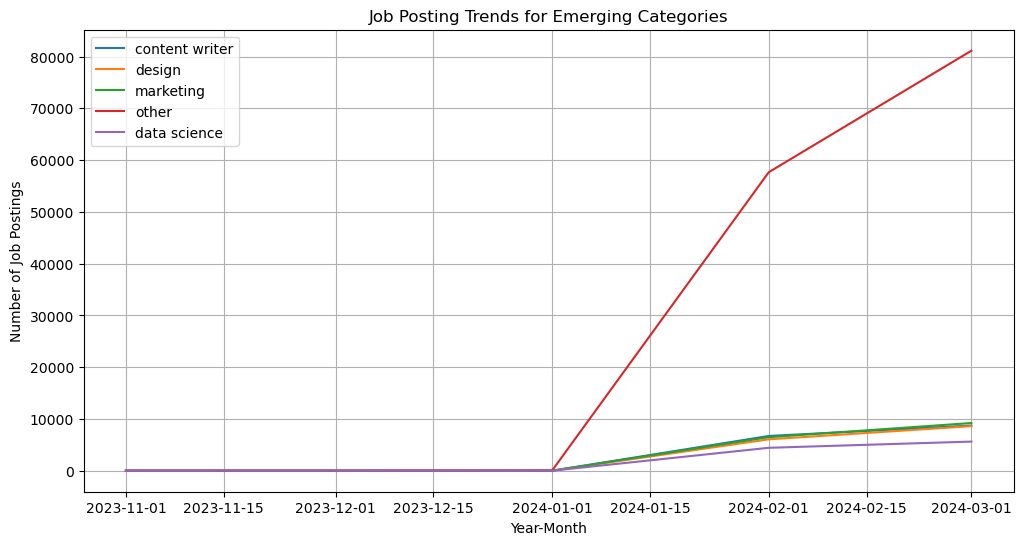

In [53]:
# Plot job trends for the top categories
plt.figure(figsize=(12, 6))
for category in top_categories:
    plt.plot(job_trends_pivot.index, job_trends_pivot[category], label=category)

plt.title('Job Posting Trends for Emerging Categories')
plt.xlabel('Year-Month')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.grid()
plt.show()


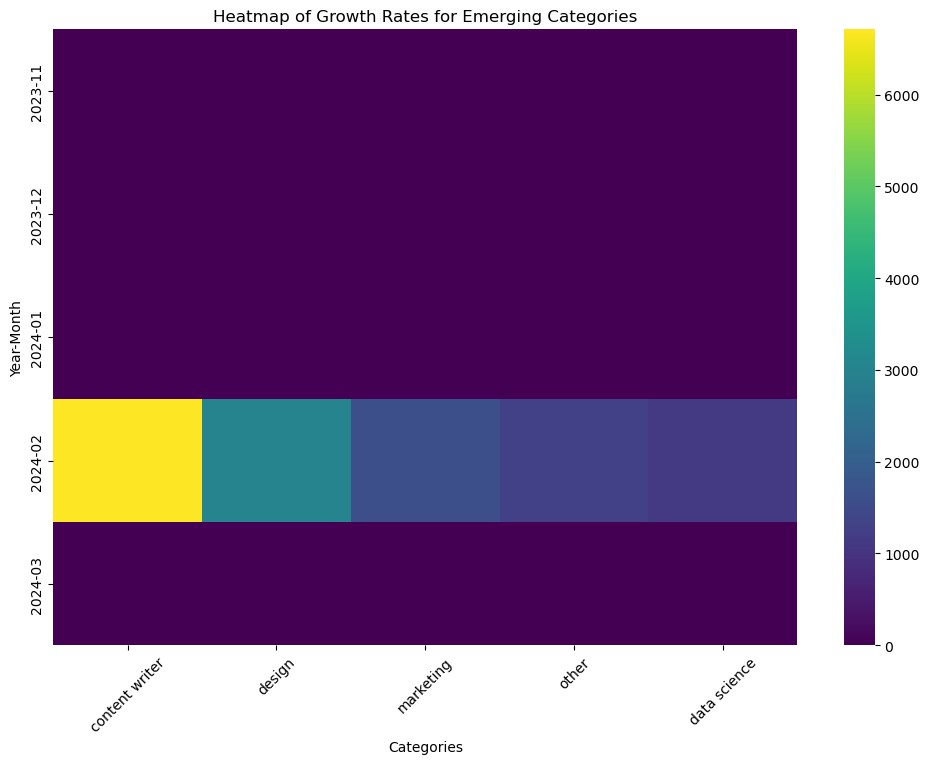

In [54]:
# Plot a heatmap of growth rates for all categories
plt.figure(figsize=(12, 8))
sns.heatmap(job_trends_pivot_growth[top_categories], cmap='viridis', annot=False)
plt.title('Heatmap of Growth Rates for Emerging Categories')
plt.xlabel('Categories')
plt.ylabel('Year-Month')
plt.xticks(rotation=45)
plt.show()



In [55]:
# Define high-demand roles based on the top 25% threshold
job_counts = df.groupby(['YearMonth', 'job_category']).size().reset_index(name='posting_count')
threshold = job_counts['posting_count'].quantile(0.75)
job_counts['high_demand'] = (job_counts['posting_count'] > threshold).astype(int)


In [56]:
# Merging the above back to main dataset
merged_data = df.merge(job_counts[['YearMonth', 'job_category', 'high_demand']], 
                       on=['YearMonth', 'job_category'], how='left')
print("Sample Data with High-Demand Labels:")
print(merged_data[['YearMonth', 'job_category', 'high_demand']].head(20))


Sample Data with High-Demand Labels:
   YearMonth          job_category  high_demand
0    2024-02                 other            1
1    2024-02  software development            1
2    2024-02                 other            1
3    2024-02             marketing            1
4    2024-02  software development            1
5    2024-02             marketing            1
6    2024-02                 other            1
7    2024-02                 other            1
8    2024-02                 other            1
9    2024-02  software development            1
10   2024-02                design            1
11   2024-02                design            1
12   2024-02             marketing            1
13   2024-02                 other            1
14   2024-02               manager            0
15   2024-02  software development            1
16   2024-02                 other            1
17   2024-02                design            1
18   2024-02                 other            1
19 

In [57]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,cleaned_title,job_category,YearMonth
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,Unknown,experienced media buyer solar pannel roofing i...,other,2024-02
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,full stack developer,software development,2024-02
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,20.0,United States,smma bubble app,other,2024-02
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,22.5,United States,talent hunter specialized marketing,marketing,2024-02
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,data engineer,software development,2024-02


In [58]:
merged_data.to_csv('dataset.csv', index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


In [59]:
# Lag features for historical trends
for lag in range(1, 4):
    merged_data[f'Lag_{lag}'] = merged_data.groupby('job_category')['high_demand'].shift(lag)


In [60]:
# Fill missing values
merged_data.fillna(0, inplace=True)


In [61]:
# Select relevant columns
features = ['Lag_1', 'Lag_2', 'Lag_3']
target = 'high_demand'


In [67]:
merged_data.to_csv('dataset.csv', index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


In [68]:
# Prepare training data
X = merged_data[features]
y = merged_data[target]


In [71]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Standardize features for deep learning model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Train and evaluate traditional ML models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:\n{np.array2string(cm, separator=', ')}\n")
    print("="*40)

# Define a deep learning model
def build_mlp_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the deep learning model
mlp_model = build_mlp_model(X_train_scaled.shape[1])
mlp_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Predict and evaluate deep learning model
y_pred_mlp = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"Deep Learning MLP Accuracy: {mlp_accuracy}")

mlp_cm = confusion_matrix(y_test, y_pred_mlp)
print("Deep Learning MLP Confusion Matrix:\n", np.array2string(mlp_cm, separator=', '))


SVC Accuracy: 0.9975493199362823
SVC Confusion Matrix:
[[ 6665,    62],
 [   58, 42181]]

RandomForest Accuracy: 0.997978188947433
RandomForest Confusion Matrix:
[[ 6680,    47],
 [   52, 42187]]

GradientBoosting Accuracy: 0.997978188947433
GradientBoosting Confusion Matrix:
[[ 6680,    47],
 [   52, 42187]]

KNeighbors Accuracy: 0.997978188947433
KNeighbors Confusion Matrix:
[[ 6680,    47],
 [   52, 42187]]

MultinomialNB Accuracy: 0.8626189600947596
MultinomialNB Confusion Matrix:
[[    0,  6727],
 [    0, 42239]]

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6121/6121 ━━━━━━━━━━━━━━━━━━━━ 6s 826us/step - accuracy: 0.9961 - loss: 0.0265 - val_accuracy: 0.9980 - val_loss: 0.0098
Epoch 2/20
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 5s 834us/step - accuracy: 0.9981 - loss: 0.0113 - val_accuracy: 0.9980 - val_loss: 0.0096
Epoch 3/20
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 5s 801us/step - accuracy: 0.9982 - loss: 0.0109 - val_accuracy: 0.9980 - val_loss: 0.0102
Epoch 4/20
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - accuracy: 0.9982 - loss: 0.0102 - val_accuracy: 0.9977 - val_loss: 0.0097
Epoch 5/20
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 5s 809us/step - accuracy: 0.9982 - loss: 0.0105 - val_accuracy: 0.9980 - val_loss: 0.0101
Epoch 6/20
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 5s 803us/step - accuracy: 0.9981 - loss: 0.0108 - val_accuracy: 0.9980 - val_loss: 0.0097
Epoch 7/20
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 5s 812us/step - accuracy: 0.9982 - loss: 0.0099 - val_accuracy: 0.9980 - val_loss: 0.0097
Epoch 8/20
6121/6121 ━━━━━━━━━━━━━━━━━━━━ 5s 816us/step - accuracy: 0.9982 - loss: 0.01

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib

# Load trained model
mlp_model = load_model("job_recommendation_model.h5")

# Load dataset
df = pd.read_csv("dataset.csv")

# Load the scaler and get expected feature names
scaler = joblib.load("scaler.pkl")
expected_features = ['Lag_1', 'Lag_2', 'Lag_3']  # Features used in training

# Ensure dataset has required columns
missing_cols = [col for col in expected_features if col not in df.columns]
if missing_cols:
    raise ValueError(f"Error: Missing expected columns in dataset: {missing_cols}")

# Initialize Dash app
app = dash.Dash(__name__)

# Dropdown options
job_categories = df['job_category'].dropna().unique()
countries = df['country'].dropna().unique()

# Salary range values
salary_min = int(df['hourly_low'].min())
salary_max = int(df['hourly_high'].max())

# App layout
app.layout = html.Div([
    html.H1("Job Recommendation System", style={'textAlign': 'center', 'marginBottom': '20px'}),
    
    html.Label("Select Job Category:"),
    dcc.Dropdown(
        id='category',
        options=[{'label': cat, 'value': cat} for cat in job_categories],
        value=job_categories[0] if len(job_categories) > 0 else None
    ),
    
    html.Label("Select Country:"),
    dcc.Dropdown(
        id='country',
        options=[{'label': country, 'value': country} for country in countries],
        value=countries[0] if len(countries) > 0 else None
    ),
    
    html.Label("Salary Range (Hourly Rate):"),
    dcc.RangeSlider(
        id='salary_range',
        min=salary_min,
        max=salary_max,
        step=1,
        marks={i: f"${i}" for i in range(salary_min, salary_max + 1, (salary_max - salary_min) // 5)},
        value=[salary_min, salary_max],
        tooltip={"placement": "bottom", "always_visible": True}
    ),

    html.Br(),
    html.Button("Get Recommendations", id='submit', n_clicks=0, style={'width': '200px', 'margin': '10px 0'}),
    html.Br(),
    html.Ul(id='recommendations')
])

# Callback for generating job recommendations
@app.callback(
    Output('recommendations', 'children'),
    Input('submit', 'n_clicks'),
    State('category', 'value'),
    State('country', 'value'),
    State('salary_range', 'value')
)
def update_recommendations(n_clicks, category, country, salary_range):
    if n_clicks == 0:
        return []

    if category is None or country is None:
        return [html.Li("Please select a valid job category and country.")]

    # Filter dataset based on user input
    filtered_df = df[(df['job_category'] == category) & (df['country'] == country)]
    filtered_df = filtered_df[
        (filtered_df['hourly_low'] >= salary_range[0]) & 
        (filtered_df['hourly_high'] <= salary_range[1])
    ]
    
    if filtered_df.empty:
        return [html.Li("No jobs found for the given criteria.")]

    try:
        # Select only the features used during training
        features = filtered_df[expected_features]

        # Scale features
        features_scaled = scaler.transform(features)

        # Get predictions
        predictions = mlp_model.predict(features_scaled).flatten()

        # Add predictions to DataFrame
        filtered_df['recommendation_score'] = predictions

        # Get top recommended jobs
        top_jobs = filtered_df.sort_values(by='recommendation_score', ascending=False).head(5)

        return [
            html.Li(f"{row['cleaned_title']} - {row['country']} - ${row['hourly_low']}-{row['hourly_high']}")
            for _, row in top_jobs.iterrows()
        ]
    
    except Exception as e:
        return [html.Li(f"Error in prediction: {str(e)}")]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
